# Exploration of population size for derangement test power

We ran the derangement test for 100 different seeds and varied the population size to find the "breaking point" for various PRNGs.

In [1]:
library(dplyr)
library(ggplot2)
library(reshape2)
library(stringr)
options(warn = (-1), message = (-1))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
combinations <- expand.grid(c("MT", "SD", "SHA256"),
                            c("pi", "fykd"))

rawdatafiles <- list.files("../rawdata/")

res <- lapply(1:nrow(combinations), function(index){
  filename <- paste0(combinations[index, 1],
                     "_derangements_", combinations[index, 2], "_findn.csv")
  if(!(filename %in% rawdatafiles)){ return()}
  
  tmp <- read.csv(paste0("../rawdata/", filename), header = TRUE)
  return(tmp)
})
res <- do.call(rbind, res)

In [3]:
head(res)

prng,algorithm,seed,n,decision_upper,LR_upper,steps_upper,decision_lower,LR_lower,steps_lower
MT,permute_indices,739828299,500,None,2.705381e-03,200000,None,0.003256812,200000
MT,permute_indices,739828299,1000,None,8.168944e-03,200000,None,0.001073605,200000
MT,permute_indices,739828299,1500,None,6.345501e-03,200000,None,0.001383580,200000
MT,permute_indices,739828299,2000,None,1.581670e-03,200000,None,0.005583181,200000
MT,permute_indices,739828299,2500,None,6.975951e-03,200000,None,0.001258040,200000
MT,permute_indices,739828299,3000,None,1.112381e-05,200000,None,0.810518435,200000


In [4]:
tmp <- melt(res, id.vars = c("prng", "algorithm", "seed", "n"))
splitCols <- str_split_fixed(tmp$variable, "_", 2)
colnames(splitCols) <- c("var", "alternative")
tmp <- cbind(tmp, splitCols)
res <- dcast(tmp, prng+algorithm+seed+alternative+n ~ var, value.var = "value")
str(res)

'data.frame':	18000 obs. of  8 variables:
 $ prng       : Factor w/ 3 levels "MT","SD","SHA256": 1 1 1 1 1 1 1 1 1 1 ...
 $ algorithm  : Factor w/ 2 levels "permute_indices",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ seed       : num  568546 568546 568546 568546 568546 ...
 $ alternative: Factor w/ 2 levels "lower","upper": 1 1 1 1 1 1 2 2 2 2 ...
 $ n          : int  500 1000 1500 2000 2500 3000 500 1000 1500 2000 ...
 $ decision   : chr  "None" "None" "None" "None" ...
 $ LR         : chr  "0.000463384141062" "0.0153999723237" "0.0923680460997" "0.0186268579355" ...
 $ steps      : chr  "200000" "200000" "200000" "200000" ...


In [5]:
print("Rejection rates, by alternative")
res %>% group_by(prng, algorithm, alternative, n) %>% summarise("Rejection rate" = mean(decision == "1"))

[1] "Rejection rates, by alternative"


prng,algorithm,alternative,n,Rejection rate
MT,permute_indices,lower,500,0.022
MT,permute_indices,lower,1000,0.021
MT,permute_indices,lower,1500,0.020
MT,permute_indices,lower,2000,0.017
MT,permute_indices,lower,2500,0.022
MT,permute_indices,lower,3000,0.021
MT,permute_indices,upper,500,0.020
MT,permute_indices,upper,1000,0.017
MT,permute_indices,upper,1500,0.014
MT,permute_indices,upper,2000,0.021


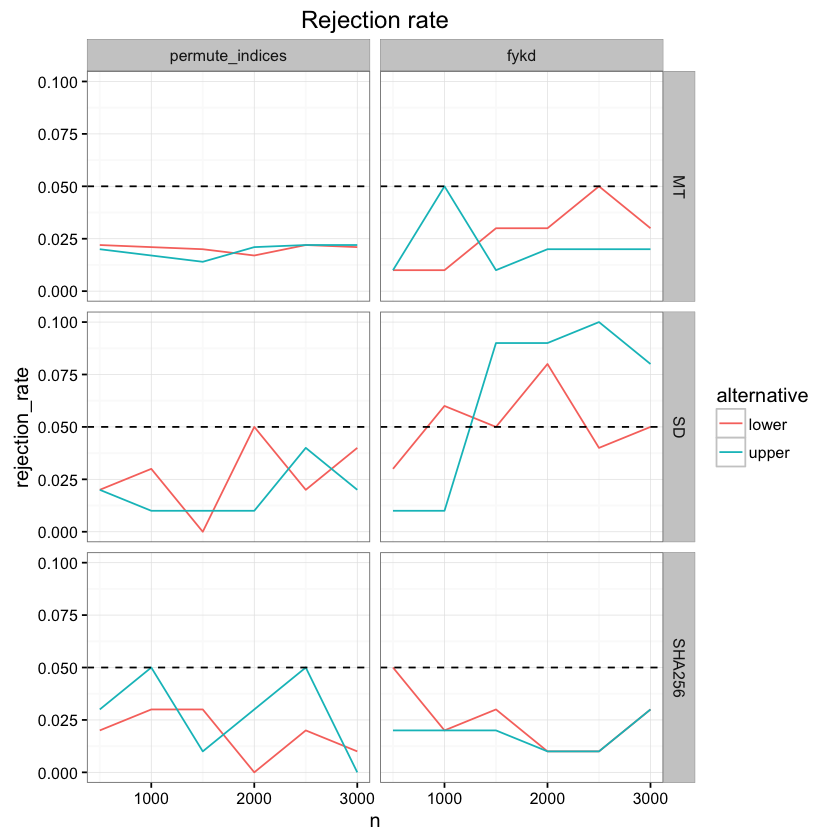

In [6]:
# plot rejection rates for varying n
res %>% 
    group_by(prng, algorithm, alternative, n) %>% 
    summarise("rejection_rate" = mean(decision == "1")) %>%
    ungroup() %>%
    ggplot(aes(x = n, y = rejection_rate, color = alternative)) + 
    geom_line() + 
    facet_grid(prng~algorithm) +
    geom_hline(yintercept = 0.05, linetype = "dashed") + 
    ggtitle("Rejection rate") +
    theme_bw()



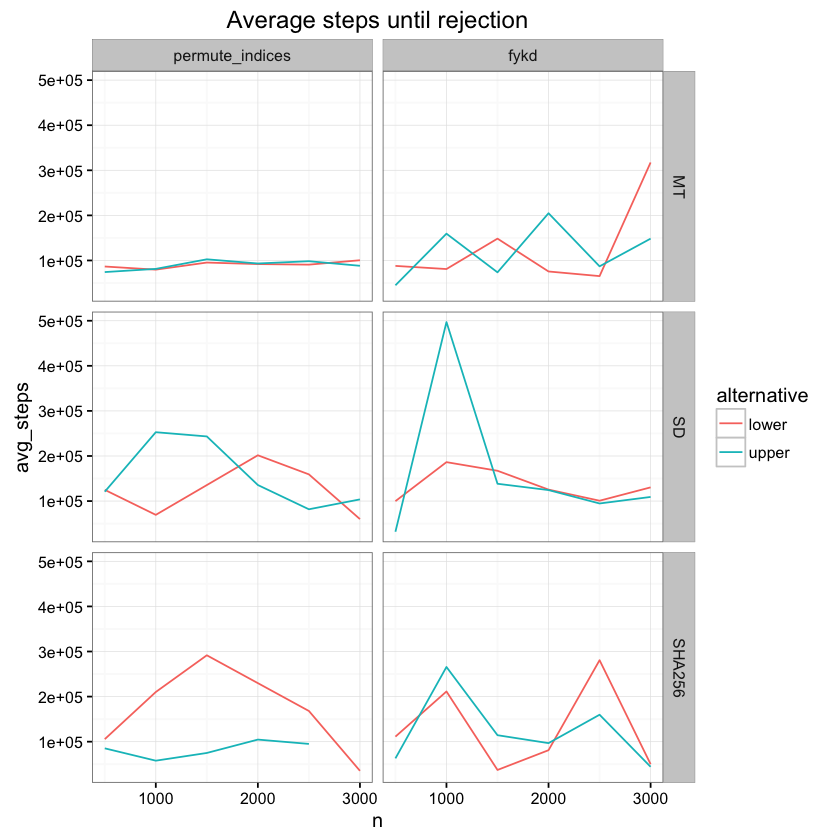

In [7]:
# plot steps for varying n
res %>% 
    filter(decision == "1") %>%
    group_by(prng, algorithm, alternative, n) %>% 
    summarise("avg_steps" = median(as.numeric(steps))) %>%
    ggplot(aes(x = n, y = avg_steps, color = alternative)) + 
    geom_line() + 
    facet_grid(prng~algorithm) +
    ggtitle("Average steps until rejection") +
    theme_bw()




In [8]:
res %>% 
    filter(decision == "1") %>% 
    summarise("median_steps" = median(as.numeric(steps)),
              "avg_steps" = mean(as.numeric(steps)),
              "max_steps" = max(as.numeric(steps)))

median_steps,avg_steps,max_steps
96002,111950.5,497028
